# Vandermonde Method

## Univariate Polynomials

Consider a distinct (no two $x_{j}$ are the same) set of $n + 1$ data points
\begin{align*}
(x_{0},y_{0}),\ldots ,(x_{j},y_{j}),\ldots ,(x_{n},y_{n}).
\end{align*}
Since each point is a solution of the polynomial, we have,

\begin{align*}
y_{0} &= f(x_{0}) = \sum _{j=0}^{n-1}c_{j}x_{0}^{j},\\
y_{1} &= f(x_{1}) = \sum _{j=0}^{n-1}c_{j}x_{1}^{j},\\
\vdots\\
y_{n-1} &= f(x_{n-1}) = \sum _{j=0}^{n-1}c_{j}x_{n-1}^{j}.
\end{align*}
This can be expressed as a system of equations. Thus,
\begin{align*}
\begin{bmatrix}
1 & x_{0} & x_{0}^{2} & \dots & x_{0}^{n-1}\\
1 & x_{1} & x_{1}^{2} & \dots & x_{1}^{n-1}\\
1 & x_{2} & x_{2}^{2} & \dots & x_{2}^{n-1}\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
1 & x_{n-1} & x_{n-1}^{2} & \dots & x_{n-1}^{n-1}
\end{bmatrix}\begin{bmatrix}c_{0}\\c_{1}\\c_{2}\\\vdots\\c_{n-1}\end{bmatrix}=
\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n-1}\end{bmatrix}.
\end{align*}
The matrix containing the values of the variables of the polynomial is called the Vandermonde Matrix:
\begin{align*}
V=\begin{bmatrix}
1 & x_{0} & x_{0}^{2} & \dots & x_{0}^{n-1}\\
1 & x_{1} & x_{1}^{2} & \dots & x_{1}^{n-1}\\
1 & x_{2} & x_{2}^{2} & \dots & x_{2}^{n-1}\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
1 & x_{n-1} & x_{n-1}^{2} & \dots & x_{n-1}^{n-1}
\end{bmatrix}
\end{align*}

Furthermore, we can prepare a Python code using the above algorithm.

In [1]:
import numpy as np
def VanderCoefs(xn, yn):
    '''
    Input: A set of distinct points xj
    Output: Vandermonde method coefficients
    '''
    V = np.zeros((len(xn), len(xn)), dtype = float)
    P = np.array(range(len(xn)))
    for i in range(len(xn)):
        V[i, :] = xn[i]**P
    cn = np.linalg.solve(V, yn)
    return cn

<font color='Blue'><b>Example</b></font>: Consider the following data points
$$\{(1,-3),~(2,0),~(3,-1),~(4,2),~(5,1),~(6,4)\}$$
and apply the Vandermonde Method.

In [2]:
# This part is used for producing tables and figures
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

In [3]:
# A set of distinct points
xn = np.array ([1 ,2 ,3 ,4 ,5 , 6])
yn = np.array ([-3 ,0 ,-1 ,2 ,1 , 4])
# Vandermonde method coefficients
cn = VanderCoefs(xn, yn)
x = np.linspace(xn.min()-1 , xn.max()+1 , 100)
y = np.polyval(np.flip(cn), x)
# Plots
hd.interpolation_method_plot(xn, yn, x, y, title = 'Vandermonde Method (Univariate Polynomials)')

## Univariate General Functions

In this method, instead of using just a polynomial, the desired functions $f_{n}$ can be used. Therefore,

\begin{align*}
y_{i} &= f(x_{i}) = \sum _{j=0}^{n-1}c_{j}f_j(x),& 0\leq 0 \leq n-1
\end{align*}
This can be expressed as a system of equations. Thus,
\begin{align*}
\begin{bmatrix}
f_{0}(x_{0}) & f_{1}(x_{0}) & f_{2}(x_{0}) & \dots & f_{n-1}(x_{0})\\
f_{0}(x_{1}) & f_{1}(x_{1}) & f_{2}(x_{1}) & \dots & f_{n-1}(x_{1})\\
f_{0}(x_{2}) & f_{1}(x_{2}) & f_{2}(x_{2}) & \dots & f_{n-1}(x_{2})\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n-1}) & f_{1}(x_{n-1}) & f_{2}(x_{n-1}) & \dots & f_{n-1}(x_{n-1})\\
\end{bmatrix}\begin{bmatrix}c_{0}\\c_{1}\\c_{2}\\\vdots\\c_{n-1}\end{bmatrix}=
\begin{bmatrix}y_{0}\\y_{1}\\y_{2}\\\vdots\\y_{n-1}\end{bmatrix},
\end{align*}
and the Vandermonde Matrix:
\begin{align*}
V = \begin{bmatrix}
f_{0}(x_{0}) & f_{1}(x_{0}) & f_{2}(x_{0}) & \dots & f_{n-1}(x_{0})\\
f_{0}(x_{1}) & f_{1}(x_{1}) & f_{2}(x_{1}) & \dots & f_{n-1}(x_{1})\\
f_{0}(x_{2}) & f_{1}(x_{2}) & f_{2}(x_{2}) & \dots & f_{n-1}(x_{2})\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n-1}) & f_{1}(x_{n-1}) & f_{2}(x_{n-1}) & \dots & f_{n-1}(x_{n-1})\\
\end{bmatrix}
\end{align*}

Similarly, we can prepare a Python code using the above algorithm.

In [4]:
def VanderCoefsGen(xn, yn, fn = False):
    '''
    Input: A set of distinct points xj
    Output: Vandermonde method coefficients
    '''
    if not fn:
        fn = lambda x: x**np.arange(len(xn))
        
    V = np.zeros((len(xn), len(xn)), dtype = float)
    for i in range(len(xn)):
        V[i, :] = fn(xn[i])
    cn = np.linalg.solve(V, yn)
    return cn

Note that, we can consider $\left\{1,~x,x^2,\ldots,x^n\right\}$ as $f_n$ functions and get the same resutls as before.

In [5]:
# A set of distinct points
xn = np.array ([1 ,2 ,3 ,4 ,5 , 6])
yn = np.array ([-3 ,0 ,-1 ,2 ,1 , 4])
# Vandermonde method coefficients
cn = VanderCoefsGen(xn, yn)
x = np.linspace(xn.min()-1 , xn.max()+1 , 100)
y = np.polyval(np.flip(cn), x)
# Plots
hd.interpolation_method_plot(xn, yn, x, y, title = 'Vandermonde Method (Univariate Polynomials)')

For the above example, we can use $\left\{\cos(x),~\cos(2x),~\cos(3x),\ldots,~\cos(nx)\right\}$ as $f_n$ functions and use the Vandermonde Method.

In [6]:
# A set of distinct points
xn = np.array ([1 ,2 ,3 ,4 ,5 , 6])
yn = np.array ([-3 ,0 ,-1 ,2 ,1 , 4])
fn = lambda x: np.array([np.cos(n*x) for n in range(len(xn))])
# Vandermonde method coefficients
cn = VanderCoefsGen(xn, yn, fn)
x = np.linspace(xn.min()-1 , xn.max()+1 , 100)
y = (cn.reshape(1, len(cn))@fn(x)).flatten()
# Plots
hd.interpolation_method_plot(xn, yn, x, y, title = 'Vandermonde Method (Univariate General Functions)')

## Multivariate Polynomials

Vandermonde's method can be extended for the interpolation of multidimensional functions. For example, in three-dimmentional space, for distinct points
\begin{align*}
(x_{0},y_{0},z_{0}),\ldots ,(x_{j},y_{j},z_{j}),\ldots ,(x_{n},y_{n},z_{n}).
\end{align*}
we have

\begin{align*}
z_{i} &= f(x_{i}, y_{i}) = \sum _{j=0}^{n-1}c_{j}f_j(x, y),& 0\leq 0 \leq n-1
\end{align*}

In this method, instead of using just a polynomial, the desired functions $f_{n}$ can be used. Therefore,

\begin{align*}
y_{i} &= f(x_{i}) = \sum _{j=0}^{n-1}c_{j}f_j(x_{i}),& 0\leq 0 \leq n-1
\end{align*}
This can be expressed as a system of equations. Thus,
\begin{align*}
\begin{bmatrix}
f_{0}(x_{0}, y_{0}) & f_{1}(x_{0}, y_{0}) & f_{2}(x_{0}, y_{0}) & \dots & f_{n-1}(x_{0}, y_{0})\\
f_{0}(x_{1}, y_{1}) & f_{1}(x_{1}, y_{1}) & f_{2}(x_{1}, y_{1}) & \dots & f_{n-1}(x_{1}, y_{1})\\
f_{0}(x_{2}, y_{2}) & f_{1}(x_{2}, y_{2})) & f_{2}(x_{2}, y_{2})) & \dots & f_{n-1}(x_{2}, y_{2}))\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n-1}, y_{n-1}) & f_{1}(x_{n-1}, y_{n-1}) & f_{2}(x_{n-1}, y_{n-1}) & \dots & f_{n-1}(x_{n-1}, y_{n-1})\\
\end{bmatrix}\begin{bmatrix}c_{0}\\c_{1}\\c_{2}\\\vdots\\c_{n-1}\end{bmatrix}=
\begin{bmatrix}z_{0}\\z_{1}\\z_{2}\\\vdots\\z_{n-1}\end{bmatrix},
\end{align*}
and the Vandermonde Matrix:
\begin{align*}
V = \begin{bmatrix}
f_{0}(x_{0}, y_{0}) & f_{1}(x_{0}, y_{0}) & f_{2}(x_{0}, y_{0}) & \dots & f_{n-1}(x_{0}, y_{0})\\
f_{0}(x_{1}, y_{1}) & f_{1}(x_{1}, y_{1}) & f_{2}(x_{1}, y_{1}) & \dots & f_{n-1}(x_{1}, y_{1})\\
f_{0}(x_{2}, y_{2}) & f_{1}(x_{2}, y_{2})) & f_{2}(x_{2}, y_{2})) & \dots & f_{n-1}(x_{2}, y_{2}))\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
f_{0}(x_{n-1}, y_{n-1}) & f_{1}(x_{n-1}, y_{n-1}) & f_{2}(x_{n-1}, y_{n-1}) & \dots & f_{n-1}(x_{n-1}, y_{n-1})\\
\end{bmatrix}
\end{align*}

Similarly, we can prepare a Python code using the above algorithm.

In [7]:
def VanderCoefs3D(xn, yn, zn, fn):
    '''
    Input: A set of distinct points xj, yj and function fn
    Output: Vandermonde method coefficients
    '''      
    V = np.zeros((len(xn), len(xn)), dtype = float)
    for i in range(len(xn)):
        V[i, :] = fn(xn[i], yn[i])
    cn = np.linalg.solve(V, zn)
    return cn

In [8]:
# A set of distinct points
xn = np.array ([-3, -2, -1, 1, 3, 5])
yn = np.array ([-3, -1, 1, 2, 3, 5])
zn = np.array ([-11 ,4 , 2 , -4 , 5, 10])

fn = lambda x, y: np.array([1, x, y, x*y, (x**2)*y, x*(y**2)])
cn = VanderCoefs3D(xn, yn, zn, fn)
# Vandermonde_Method_Plot_3D(xn, yn, zn, cn, fn)

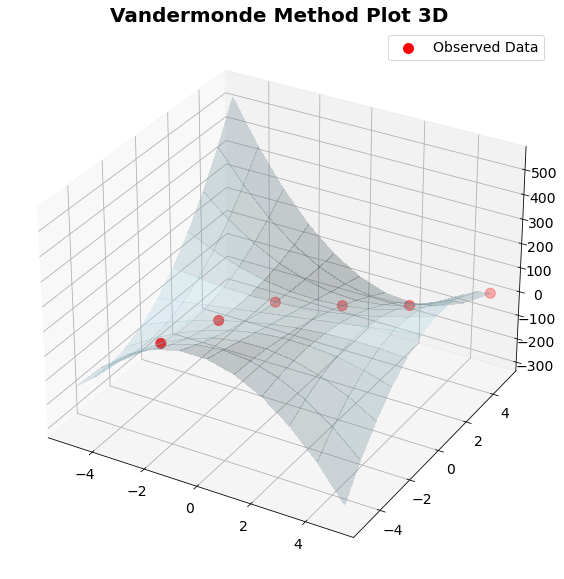

In [9]:
import matplotlib.pyplot as plt

fontsize = 14
Fig_Params = ['legend.fontsize','axes.labelsize','axes.titlesize','xtick.labelsize','ytick.labelsize']
Fig_Params = dict(zip(Fig_Params, len(Fig_Params)*[fontsize]))
plt.rcParams.update(Fig_Params)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')

x, y = np.meshgrid(np.arange(-5,6), np.arange(-5, 6), indexing='xy')
z = np.zeros(x.shape)
for (i,j),_ in np.ndenumerate(z):
        z[i,j] = fn(x[i,j], y[i,j])@cn

# Plot the surface.
surf = ax.plot_surface(x, y, z, color = 'lightblue', linewidth=0, antialiased=False, alpha = 0.3)
_ = ax.scatter(xn, yn, zn, marker= 'o', s =100, c = 'red', zorder = 2, label = 'Observed Data')
_ = ax.legend()
_ = ax.set_title('Vandermonde Method Plot 3D', fontsize = 20, weight = 'bold')

***
**References:**
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
1. Zarowski, Christopher J. An introduction to numerical analysis for electrical and computer engineers. John Wiley & Sons, 2004.
1. [Vandermonde matrix Wikipedia page](https://en.wikipedia.org/wiki/Vandermonde_matrix)
***